In [ ]:
# Project Proposal:

# Our project is to identify the favorite hiking trails around Sacramento throughout different seasons of the year. 
# We'll examine hiking trails available within a 150 mile radius; 
# the relationships between the ratings, 
# weather conditions, length of trail 
# and related questions, as the data admits


# Ratings, length, elevation, difficulty : are they related? If so, what is the relationship?

# What impacts ratings more?
# Length
# Elevation
# Difficulty

# Our project is to identify what factors might influence how people rate hiking trails. 
# We'll examine trails available within a 150 mile radius of Sacramento; 
# find the variables that affect their ratings and 
# which of these variables have the strongest relationship with trail ratings. 
# Our findings could help people identify other highly rated trails outside of the 150 mile radius.

# By identifying the strongest relationships, we can predict the potential of a trail to be highly rated.

In [25]:
%matplotlib notebook

In [269]:
# Dependencies
import requests
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
from matplotlib import cm
from pprint import pprint
from config import api_key

url = "https://www.hikingproject.com/data/get-trails?"

In [184]:
lat = 38.5816
lon = -121.4944
maxDistance = 150
maxResults = 500
sort = 'distance'
key = api_key

In [185]:
# Query
query_url = f"{url}lat={lat}&lon={lon}&maxDistance={maxDistance}&maxResults={maxResults}&sort={sort}&key={key}"
query_url

'https://www.hikingproject.com/data/get-trails?lat=38.5816&lon=-121.4944&maxDistance=150&maxResults=500&sort=distance&key=200684868-72bf127ca9e9ba5924d3b7d37a05d12c'

In [186]:
# Request data
data = requests.get(query_url).json()

In [187]:
data

{'trails': [{'id': 7021990,
   'name': 'Seasonal Wetland Loop',
   'type': 'Hike',
   'summary': 'A scenic loop around one of the wetland areas in Yolo Basin on a wide path with wildlife viewing.',
   'difficulty': 'green',
   'stars': 3.5,
   'starVotes': 2,
   'location': 'Davis, California',
   'url': 'https://www.hikingproject.com/trail/7021990/seasonal-wetland-loop',
   'imgSqSmall': 'https://cdn-files.apstatic.com/hike/7063351_sqsmall_1569428182.jpg',
   'imgSmall': 'https://cdn-files.apstatic.com/hike/7063351_small_1569428182.jpg',
   'imgSmallMed': 'https://cdn-files.apstatic.com/hike/7063351_smallMed_1569428182.jpg',
   'imgMedium': 'https://cdn-files.apstatic.com/hike/7063351_medium_1569428182.jpg',
   'length': 3.1,
   'ascent': 10,
   'descent': -12,
   'high': 17,
   'low': 11,
   'longitude': -121.6261,
   'latitude': 38.5505,
   'conditionStatus': 'Unknown',
   'conditionDetails': None,
   'conditionDate': '1970-01-01 00:00:00'},
  {'id': 7089186,
   'name': 'Nature Loop

In [188]:
len(data["trails"])

500

In [189]:
# Storing returned api data as a Pandas dataframe.

trails_df = pd.DataFrame(data["trails"])

In [190]:
trails_df

,ascent,conditionDate,conditionDetails,conditionStatus,descent,difficulty,high,id,imgMedium,imgSmall,...,length,location,longitude,low,name,starVotes,stars,summary,type,url
0,10,1970-01-01 00:00:00,None,Unknown,-12,green,17,7021990,https://cdn-files.apstatic.com/hike/7063351_me...,https://cdn-files.apstatic.com/hike/7063351_sm...,...,3.1,"Davis, California",-121.6261,11,Seasonal Wetland Loop,2,3.5,A scenic loop around one of the wetland areas ...,Hike,https://www.hikingproject.com/trail/7021990/se...
1,21,1970-01-01 00:00:00,None,Unknown,-20,greenBlue,77,7089186,https://cdn-files.apstatic.com/hike/7065291_me...,https://cdn-files.apstatic.com/hike/7065291_sm...,...,1.6,"Carmichael, California",-121.3127,69,Nature Loop,1,5.0,A common loop that explores the park.,Hike,https://www.hikingproject.com/trail/7089186/na...
2,88,1970-01-01 00:00:00,None,Unknown,-84,green,51,7023706,https://cdn-files.apstatic.com/hike/7057450_me...,https://cdn-files.apstatic.com/hike/7057450_sm...,...,4.0,"Thornton, California",-121.4403,9,Cosumnes Nature Loop,9,4.0,A nature-watcher's delight that follows trails...,Hike,https://www.hikingproject.com/trail/7023706/co...
3,293,1970-01-01 00:00:00,None,Unknown,-294,greenBlue,194,7016942,https://cdn-files.apstatic.com/hike/7016940_me...,https://cdn-files.apstatic.com/hike/7016940_sm...,...,12.0,"Folsom, California",-121.1804,110,Lake Natoma Loop,9,4.2,Hike around Lake Natoma on bike paths with an ...,Hike,https://www.hikingproject.com/trail/7016942/la...
4,65,1970-01-01 00:00:00,None,Unknown,-65,green,430,7027546,https://cdn-files.apstatic.com/hike/7044187_me...,https://cdn-files.apstatic.com/hike/7044187_sm...,...,3.2,"Loomis, California",-121.2058,396,Traylor Ranch Bird Sanctuary,3,2.0,There are lots of birds to see and lots of loo...,Hike,https://www.hikingproject.com/trail/7027546/tr...
5,1413,1970-01-01 00:00:00,None,Unknown,-1409,blueBlack,1539,7003896,https://cdn-files.apstatic.com/hike/7058169_me...,https://cdn-files.apstatic.com/hike/7058169_sm...,...,5.1,"Winters, California",-122.0970,231,Stebbins Cold Canyon Loop,29,4.3,A challenging trail with a great view of Lake ...,Hike,https://www.hikingproject.com/trail/7003896/st...
6,811,1970-01-01 00:00:00,None,Unknown,-812,blue,982,7018582,https://cdn-files.apstatic.com/hike/7018074_me...,https://cdn-files.apstatic.com/hike/7018074_sm...,...,8.6,"North Auburn, California",-121.1644,431,Hidden Falls Loop,9,4.0,A loop with waterfalls that are tucked away an...,Hike,https://www.hikingproject.com/trail/7018582/hi...
7,771,2019-11-24 05:19:55,Dry,All Clear,-760,greenBlue,1231,7003413,https://cdn-files.apstatic.com/hike/7003212_me...,https://cdn-files.apstatic.com/hike/7003212_sm...,...,6.2,"Auburn Lake Trails, California",-120.9889,618,Cronan Ranch Loop,18,4.2,An enjoyable hike with spectacular views of th...,Hike,https://www.hikingproject.com/trail/7003413/cr...
8,121,2020-01-25 19:34:02,Dry,All Clear,-122,greenBlue,701,7070912,https://cdn-files.apstatic.com/hike/7053911_me...,https://cdn-files.apstatic.com/hike/7053911_sm...,...,2.1,"Auburn, California",-121.0400,600,Black Hole of Calcutta Falls,5,4.0,"An easy, popular, scenic trail that is great f...",Hike,https://www.hikingproject.com/trail/7070912/bl...
9,752,1970-01-01 00:00:00,None,Unknown,-751,blueBlack,1358,7019896,https://cdn-files.apstatic.com/hike/7020852_me...,https://cdn-files.apstatic.com/hike/7020852_sm...,...,2.6,"Auburn, California",-121.0399,612,Training Hill to Pig Farm to Robie Trail Loop,4,4.0,"After climbing half of Training Hill, this mer...",Hike,https://www.hikingproject.com/trail/7019896/tr...


In [191]:
# Hiking Trails API color-codes difficulty of the trails. We need to convert color names to difficultly equivalents.
# green = easy ; blue = intermediate ; black = difficult ; and any combination thereof

# ran initial script and used groupby('difficulty') to identify missed categories. Modified script below accordingly.

trails_df['difficulty'] = trails_df['difficulty'].replace('green','Easy')
trails_df['difficulty'] = trails_df['difficulty'].replace('greenBlue','Easy/Intermediate')
trails_df['difficulty'] = trails_df['difficulty'].replace('blue','Intermediate')
trails_df['difficulty'] = trails_df['difficulty'].replace('blueBlack','Intermediate/Difficult')
trails_df['difficulty'] = trails_df['difficulty'].replace('black','Difficult')
trails_df['difficulty'] = trails_df['difficulty'].replace('dblack','Extremely Difficult')
trails_df

,ascent,conditionDate,conditionDetails,conditionStatus,descent,difficulty,high,id,imgMedium,imgSmall,...,length,location,longitude,low,name,starVotes,stars,summary,type,url
0,10,1970-01-01 00:00:00,None,Unknown,-12,Easy,17,7021990,https://cdn-files.apstatic.com/hike/7063351_me...,https://cdn-files.apstatic.com/hike/7063351_sm...,...,3.1,"Davis, California",-121.6261,11,Seasonal Wetland Loop,2,3.5,A scenic loop around one of the wetland areas ...,Hike,https://www.hikingproject.com/trail/7021990/se...
1,21,1970-01-01 00:00:00,None,Unknown,-20,Easy/Intermediate,77,7089186,https://cdn-files.apstatic.com/hike/7065291_me...,https://cdn-files.apstatic.com/hike/7065291_sm...,...,1.6,"Carmichael, California",-121.3127,69,Nature Loop,1,5.0,A common loop that explores the park.,Hike,https://www.hikingproject.com/trail/7089186/na...
2,88,1970-01-01 00:00:00,None,Unknown,-84,Easy,51,7023706,https://cdn-files.apstatic.com/hike/7057450_me...,https://cdn-files.apstatic.com/hike/7057450_sm...,...,4.0,"Thornton, California",-121.4403,9,Cosumnes Nature Loop,9,4.0,A nature-watcher's delight that follows trails...,Hike,https://www.hikingproject.com/trail/7023706/co...
3,293,1970-01-01 00:00:00,None,Unknown,-294,Easy/Intermediate,194,7016942,https://cdn-files.apstatic.com/hike/7016940_me...,https://cdn-files.apstatic.com/hike/7016940_sm...,...,12.0,"Folsom, California",-121.1804,110,Lake Natoma Loop,9,4.2,Hike around Lake Natoma on bike paths with an ...,Hike,https://www.hikingproject.com/trail/7016942/la...
4,65,1970-01-01 00:00:00,None,Unknown,-65,Easy,430,7027546,https://cdn-files.apstatic.com/hike/7044187_me...,https://cdn-files.apstatic.com/hike/7044187_sm...,...,3.2,"Loomis, California",-121.2058,396,Traylor Ranch Bird Sanctuary,3,2.0,There are lots of birds to see and lots of loo...,Hike,https://www.hikingproject.com/trail/7027546/tr...
5,1413,1970-01-01 00:00:00,None,Unknown,-1409,Intermediate/Difficult,1539,7003896,https://cdn-files.apstatic.com/hike/7058169_me...,https://cdn-files.apstatic.com/hike/7058169_sm...,...,5.1,"Winters, California",-122.0970,231,Stebbins Cold Canyon Loop,29,4.3,A challenging trail with a great view of Lake ...,Hike,https://www.hikingproject.com/trail/7003896/st...
6,811,1970-01-01 00:00:00,None,Unknown,-812,Intermediate,982,7018582,https://cdn-files.apstatic.com/hike/7018074_me...,https://cdn-files.apstatic.com/hike/7018074_sm...,...,8.6,"North Auburn, California",-121.1644,431,Hidden Falls Loop,9,4.0,A loop with waterfalls that are tucked away an...,Hike,https://www.hikingproject.com/trail/7018582/hi...
7,771,2019-11-24 05:19:55,Dry,All Clear,-760,Easy/Intermediate,1231,7003413,https://cdn-files.apstatic.com/hike/7003212_me...,https://cdn-files.apstatic.com/hike/7003212_sm...,...,6.2,"Auburn Lake Trails, California",-120.9889,618,Cronan Ranch Loop,18,4.2,An enjoyable hike with spectacular views of th...,Hike,https://www.hikingproject.com/trail/7003413/cr...
8,121,2020-01-25 19:34:02,Dry,All Clear,-122,Easy/Intermediate,701,7070912,https://cdn-files.apstatic.com/hike/7053911_me...,https://cdn-files.apstatic.com/hike/7053911_sm...,...,2.1,"Auburn, California",-121.0400,600,Black Hole of Calcutta Falls,5,4.0,"An easy, popular, scenic trail that is great f...",Hike,https://www.hikingproject.com/trail/7070912/bl...
9,752,1970-01-01 00:00:00,None,Unknown,-751,Intermediate/Difficult,1358,7019896,https://cdn-files.apstatic.com/hike/7020852_me...,https://cdn-files.apstatic.com/hike/7020852_sm...,...,2.6,"Auburn, California",-121.0399,612,Training Hill to Pig Farm to Robie Trail Loop,4,4.0,"After climbing half of Training Hill, this mer...",Hike,https://www.hikingproject.com/trail/7019896/tr...


In [192]:
trails_df.columns

Index(['ascent', 'conditionDate', 'conditionDetails', 'conditionStatus',
       'descent', 'difficulty', 'high', 'id', 'imgMedium', 'imgSmall',
       'imgSmallMed', 'imgSqSmall', 'latitude', 'length', 'location',
       'longitude', 'low', 'name', 'starVotes', 'stars', 'summary', 'type',
       'url'],
      dtype='object')

In [193]:
trails_dropped = pd.DataFrame(trails_df[['id', 'name', 'type', 'summary', 'difficulty', 'stars', 'starVotes',
       'location', 'length', 'ascent', 'descent', 'high', 'low', 'longitude', 'latitude',
       'conditionStatus', 'conditionDetails', 'conditionDate']])

In [194]:
trails_dropped['popular_vote'] = trails_dropped['stars']*trails_dropped['starVotes']

In [195]:
trails_dropped

,id,name,type,summary,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate,popular_vote
0,7021990,Seasonal Wetland Loop,Hike,A scenic loop around one of the wetland areas ...,Easy,3.5,2,"Davis, California",3.1,10,-12,17,11,-121.6261,38.5505,Unknown,None,1970-01-01 00:00:00,7.0
1,7089186,Nature Loop,Hike,A common loop that explores the park.,Easy/Intermediate,5.0,1,"Carmichael, California",1.6,21,-20,77,69,-121.3127,38.6168,Unknown,None,1970-01-01 00:00:00,5.0
2,7023706,Cosumnes Nature Loop,Hike,A nature-watcher's delight that follows trails...,Easy,4.0,9,"Thornton, California",4.0,88,-84,51,9,-121.4403,38.2657,Unknown,None,1970-01-01 00:00:00,36.0
3,7016942,Lake Natoma Loop,Hike,Hike around Lake Natoma on bike paths with an ...,Easy/Intermediate,4.2,9,"Folsom, California",12.0,293,-294,194,110,-121.1804,38.6766,Unknown,None,1970-01-01 00:00:00,37.8
4,7027546,Traylor Ranch Bird Sanctuary,Hike,There are lots of birds to see and lots of loo...,Easy,2.0,3,"Loomis, California",3.2,65,-65,430,396,-121.2058,38.8485,Unknown,None,1970-01-01 00:00:00,6.0
5,7003896,Stebbins Cold Canyon Loop,Hike,A challenging trail with a great view of Lake ...,Intermediate/Difficult,4.3,29,"Winters, California",5.1,1413,-1409,1539,231,-122.0970,38.5119,Unknown,None,1970-01-01 00:00:00,124.7
6,7018582,Hidden Falls Loop,Hike,A loop with waterfalls that are tucked away an...,Intermediate,4.0,9,"North Auburn, California",8.6,811,-812,982,431,-121.1644,38.9589,Unknown,None,1970-01-01 00:00:00,36.0
7,7003413,Cronan Ranch Loop,Hike,An enjoyable hike with spectacular views of th...,Easy/Intermediate,4.2,18,"Auburn Lake Trails, California",6.2,771,-760,1231,618,-120.9889,38.8260,All Clear,Dry,2019-11-24 05:19:55,75.6
8,7070912,Black Hole of Calcutta Falls,Hike,"An easy, popular, scenic trail that is great f...",Easy/Intermediate,4.0,5,"Auburn, California",2.1,121,-122,701,600,-121.0400,38.9150,All Clear,Dry,2020-01-25 19:34:02,20.0
9,7019896,Training Hill to Pig Farm to Robie Trail Loop,Hike,"After climbing half of Training Hill, this mer...",Intermediate/Difficult,4.0,4,"Auburn, California",2.6,752,-751,1358,612,-121.0399,38.9151,Unknown,None,1970-01-01 00:00:00,16.0


In [196]:
trails_dropped.to_csv('trails_dropped.csv')

In [197]:
# For ratings and length of trail analysis
# box plot of length of trail by ratings

# ordered bar chart for popular vote (length of trail)
# --scatterplot (length of trail vs pop vote)

<IPython.core.display.Javascript object>


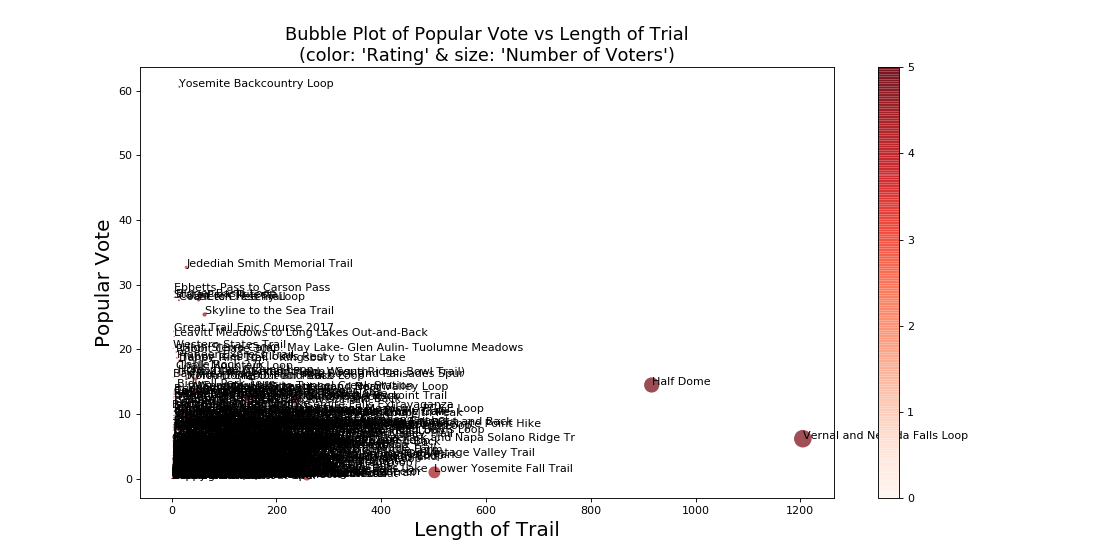

In [198]:
# Plot test results with table query for QA/QC.

fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('popular_vote', 'length', data=trails_dropped, c='stars', s='starVotes', cmap='Reds', alpha=0.7, edgecolors='None', linewidths=.5)
plt.title("Bubble Plot of Popular Vote vs Length of Trial\n(color: 'Rating' & size: 'Number of Voters')", fontsize=16)
plt.xlabel('Length of Trail', fontsize=18)
plt.ylabel('Popular Vote', fontsize=18)
plt.colorbar()
for i,text in enumerate(trails_dropped.name):
    plt.annotate(text, xy=(trails_dropped.popular_vote[i], trails_dropped.length[i]))
plt.show()     

<IPython.core.display.Javascript object>


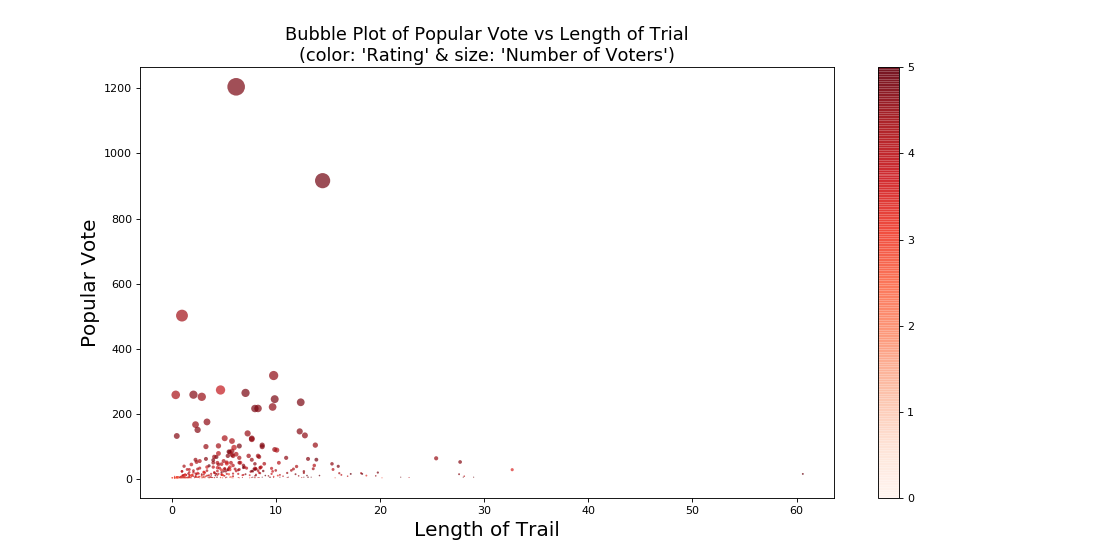

In [199]:
# Plot

fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('length', 'popular_vote', data=trails_dropped, c='stars', s='starVotes', cmap='Reds', alpha=0.7, edgecolors='None', linewidths=.5)
plt.title("Bubble Plot of Popular Vote vs Length of Trial\n(color: 'Rating' & size: 'Number of Voters')", fontsize=16)
plt.xlabel('Length of Trail', fontsize=18)
plt.ylabel('Popular Vote', fontsize=18)
plt.colorbar()
plt.show()

In [71]:
plt.savefig('BubblePlot_Length.png')

<IPython.core.display.Javascript object>


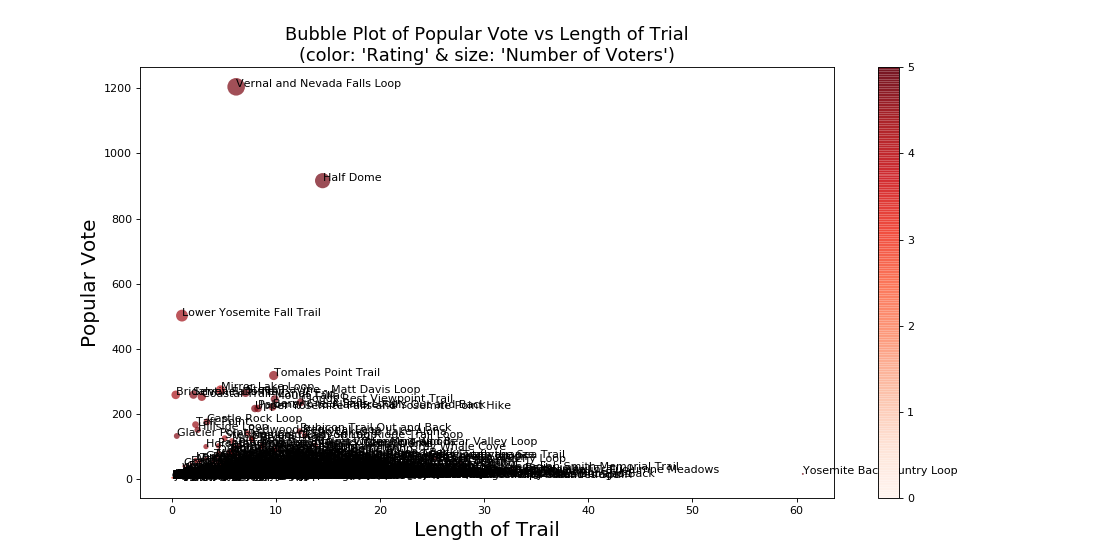

In [200]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('length', 'popular_vote', data=trails_dropped, c='stars', s='starVotes', cmap='Reds', alpha=0.7, edgecolors='None', linewidths=.5)
plt.title("Bubble Plot of Popular Vote vs Length of Trial\n(color: 'Rating' & size: 'Number of Voters')", fontsize=16)
plt.xlabel('Length of Trail', fontsize=18)
plt.ylabel('Popular Vote', fontsize=18)
plt.colorbar()
for i,text in enumerate(trails_dropped.name):
    plt.annotate(text, xy=(trails_dropped.length[i], trails_dropped.popular_vote[i]))
plt.show() 

In [201]:
sum(list(trails_dropped['starVotes']))

3135

In [202]:
trails_indexed = trails_dropped.set_index('name')
trails_indexed.loc[['Yosemite Backcountry Loop','Half Dome']]

,id,type,summary,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate,popular_vote
name,,,,,,,,,,,,,,,,,,
Yosemite Backcountry Loop,7012515,Hike,An epic jaunt through the remote northern reac...,Difficult,5.0,3,"Yosemite Valley, California",60.6,10264,-10264,10100,4368,-119.3344,37.8776,Unknown,None,1970-01-01 00:00:00,15.0
Half Dome,7005207,Hike,THE premier route in Yosemite. Hike to the top...,Difficult,4.9,187,"Yosemite Valley, California",14.5,4457,-4457,8476,4083,-119.5583,37.7325,All Clear,,2019-11-17 23:03:06,916.3


In [203]:
length_bins = trails_dropped[['name', 'stars','starVotes','popular_vote', 'location','length','longitude','latitude']]
length_bins = length_bins.sort_values(by=['length'])
length_bins

,name,stars,starVotes,popular_vote,location,length,longitude,latitude
286,Connector Trail,0.0,0,0.0,"Loomis, California",0.0,-121.2094,38.8494
311,Hidden Falls Lookout Spur,0.0,0,0.0,"North Auburn, California",0.0,-121.1781,38.9667
317,Poppy Connector,0.0,0,0.0,"North Auburn, California",0.0,-121.1639,38.9593
430,Connector Trail,0.0,0,0.0,"Green Valley, California",0.0,-122.1374,38.2443
468,Parking Connector,3.0,1,3.0,"Alta Sierra, California",0.0,-121.0359,39.1496
291,Old Barn Cutoff Trail,0.0,0,0.0,"Loomis, California",0.1,-121.2057,38.8497
363,The Wall,0.0,0,0.0,"Vacaville, California",0.1,-122.0027,38.3258
283,Duck Pond Loop,0.0,0,0.0,"Loomis, California",0.1,-121.2094,38.8480
270,River Walk Spur,0.0,0,0.0,"Thornton, California",0.1,-121.4346,38.2610
485,River View Trailhead Connector,0.0,0,0.0,"Clayton, California",0.1,-121.8633,37.9582


In [204]:
length_bins['length'].value_counts(bins=5)

(-0.0616, 12.12]    457
(12.12, 24.24]       35
(24.24, 36.36]        7
(48.48, 60.6]         1
(36.36, 48.48]        0
Name: length, dtype: int64

In [205]:
length_bins['length_bin'] = pd.cut(x=length_bins['length'], bins=[0, 3, 6, 10, 18])
length_bins

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin
286,Connector Trail,0.0,0,0.0,"Loomis, California",0.0,-121.2094,38.8494,NaN
311,Hidden Falls Lookout Spur,0.0,0,0.0,"North Auburn, California",0.0,-121.1781,38.9667,NaN
317,Poppy Connector,0.0,0,0.0,"North Auburn, California",0.0,-121.1639,38.9593,NaN
430,Connector Trail,0.0,0,0.0,"Green Valley, California",0.0,-122.1374,38.2443,NaN
468,Parking Connector,3.0,1,3.0,"Alta Sierra, California",0.0,-121.0359,39.1496,NaN
291,Old Barn Cutoff Trail,0.0,0,0.0,"Loomis, California",0.1,-121.2057,38.8497,"(0, 3]"
363,The Wall,0.0,0,0.0,"Vacaville, California",0.1,-122.0027,38.3258,"(0, 3]"
283,Duck Pond Loop,0.0,0,0.0,"Loomis, California",0.1,-121.2094,38.8480,"(0, 3]"
270,River Walk Spur,0.0,0,0.0,"Thornton, California",0.1,-121.4346,38.2610,"(0, 3]"
485,River View Trailhead Connector,0.0,0,0.0,"Clayton, California",0.1,-121.8633,37.9582,"(0, 3]"


In [206]:
## Uh oh. Bin issue. Values = 0 were not included...that is fine. But Values above 18 we excluded...not desirable.
# Try again.

In [207]:
length_bins = trails_dropped[['name', 'stars','starVotes','popular_vote', 'location','length','longitude','latitude']]
length_bins = length_bins.sort_values(by=['length'])
length_bins['length_bin'] = pd.cut(x=length_bins['length'], bins=[0, 3, 6, 10, 18, 61])
length_bins = length_bins.dropna(how='any')
length_bins

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin
291,Old Barn Cutoff Trail,0.0,0,0.0,"Loomis, California",0.1,-121.2057,38.8497,"(0, 3]"
363,The Wall,0.0,0,0.0,"Vacaville, California",0.1,-122.0027,38.3258,"(0, 3]"
283,Duck Pond Loop,0.0,0,0.0,"Loomis, California",0.1,-121.2094,38.8480,"(0, 3]"
270,River Walk Spur,0.0,0,0.0,"Thornton, California",0.1,-121.4346,38.2610,"(0, 3]"
485,River View Trailhead Connector,0.0,0,0.0,"Clayton, California",0.1,-121.8633,37.9582,"(0, 3]"
269,River Walk Extension,3.0,1,3.0,"Thornton, California",0.1,-121.4380,38.2609,"(0, 3]"
452,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3145,38.7786,"(0, 3]"
256,Connector Trail,0.0,0,0.0,"Carmichael, California",0.1,-121.3086,38.6150,"(0, 3]"
429,Connector Trail,0.0,0,0.0,"Green Valley, California",0.1,-122.1353,38.2433,"(0, 3]"
431,Connector Trail,0.0,0,0.0,"Green Valley, California",0.1,-122.1313,38.2391,"(0, 3]"


In [208]:
# create a new column in df with 5 bin labels as follows:
# Short Trail: 0-3
# Short/Medium Trail: 3-6
# Medium Trail: 6-10
# Medium/Long:10-18
# Long: 18+

length_bins['length_category'] = pd.cut(x=length_bins['length'], bins=[0, 3, 6, 10, 18, 61], labels=['Short', 'Short/Medium', 'Medium', 'Medium/Long', 'Long'])
length_bins

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
291,Old Barn Cutoff Trail,0.0,0,0.0,"Loomis, California",0.1,-121.2057,38.8497,"(0, 3]",Short
363,The Wall,0.0,0,0.0,"Vacaville, California",0.1,-122.0027,38.3258,"(0, 3]",Short
283,Duck Pond Loop,0.0,0,0.0,"Loomis, California",0.1,-121.2094,38.8480,"(0, 3]",Short
270,River Walk Spur,0.0,0,0.0,"Thornton, California",0.1,-121.4346,38.2610,"(0, 3]",Short
485,River View Trailhead Connector,0.0,0,0.0,"Clayton, California",0.1,-121.8633,37.9582,"(0, 3]",Short
269,River Walk Extension,3.0,1,3.0,"Thornton, California",0.1,-121.4380,38.2609,"(0, 3]",Short
452,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3145,38.7786,"(0, 3]",Short
256,Connector Trail,0.0,0,0.0,"Carmichael, California",0.1,-121.3086,38.6150,"(0, 3]",Short
429,Connector Trail,0.0,0,0.0,"Green Valley, California",0.1,-122.1353,38.2433,"(0, 3]",Short
431,Connector Trail,0.0,0,0.0,"Green Valley, California",0.1,-122.1313,38.2391,"(0, 3]",Short


In [209]:
categories = length_bins.length_category.unique()
categories

[Short, Short/Medium, Medium, Medium/Long, Long]
Categories (5, object): [Short < Short/Medium < Medium < Medium/Long < Long]

In [210]:
categories = list(length_bins.length_category.unique())
categories

['Short', 'Short/Medium', 'Medium', 'Medium/Long', 'Long']

In [211]:
Bin_count = length_bins.length_category.value_counts()
Bin_count

Short           253
Short/Medium    108
Medium           76
Medium/Long      42
Long             16
Name: length_category, dtype: int64

In [212]:
Bin_count = list(length_bins.length_category.value_counts())
Bin_count

[253, 108, 76, 42, 16]

<IPython.core.display.Javascript object>


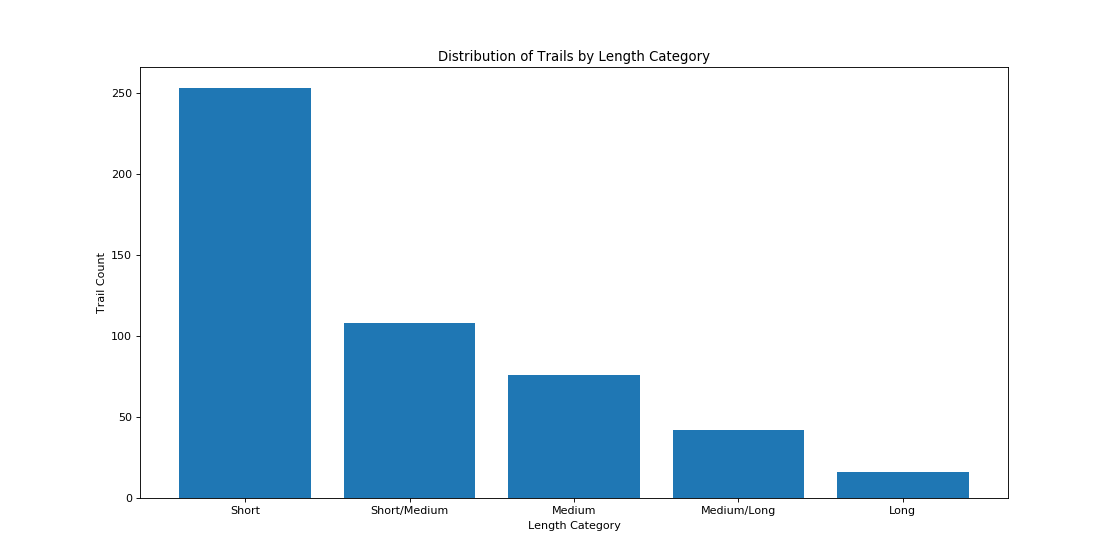

In [213]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')  
plt.bar(categories, Bin_count)
plt.title('Distribution of Trails by Length Category')
plt.xlabel('Length Category')
plt.ylabel('Trail Count')
plt.show()

In [214]:
#whoops. want equally distributed bins. Maybe try quantile based approach to decide bin values.

In [215]:
length_bins_take2 = trails_dropped[['name', 'stars','starVotes','popular_vote', 'location','length','longitude','latitude']]
length_bins_take2 = length_bins_take2.sort_values(by=['length'])
length_bins_take2

,name,stars,starVotes,popular_vote,location,length,longitude,latitude
286,Connector Trail,0.0,0,0.0,"Loomis, California",0.0,-121.2094,38.8494
311,Hidden Falls Lookout Spur,0.0,0,0.0,"North Auburn, California",0.0,-121.1781,38.9667
317,Poppy Connector,0.0,0,0.0,"North Auburn, California",0.0,-121.1639,38.9593
430,Connector Trail,0.0,0,0.0,"Green Valley, California",0.0,-122.1374,38.2443
468,Parking Connector,3.0,1,3.0,"Alta Sierra, California",0.0,-121.0359,39.1496
291,Old Barn Cutoff Trail,0.0,0,0.0,"Loomis, California",0.1,-121.2057,38.8497
363,The Wall,0.0,0,0.0,"Vacaville, California",0.1,-122.0027,38.3258
283,Duck Pond Loop,0.0,0,0.0,"Loomis, California",0.1,-121.2094,38.8480
270,River Walk Spur,0.0,0,0.0,"Thornton, California",0.1,-121.4346,38.2610
485,River View Trailhead Connector,0.0,0,0.0,"Clayton, California",0.1,-121.8633,37.9582


In [216]:
# remove rows with length = 0
length_bins_take2 = length_bins_take2.iloc[5:]
length_bins_take2

,name,stars,starVotes,popular_vote,location,length,longitude,latitude
291,Old Barn Cutoff Trail,0.0,0,0.0,"Loomis, California",0.1,-121.2057,38.8497
363,The Wall,0.0,0,0.0,"Vacaville, California",0.1,-122.0027,38.3258
283,Duck Pond Loop,0.0,0,0.0,"Loomis, California",0.1,-121.2094,38.8480
270,River Walk Spur,0.0,0,0.0,"Thornton, California",0.1,-121.4346,38.2610
485,River View Trailhead Connector,0.0,0,0.0,"Clayton, California",0.1,-121.8633,37.9582
269,River Walk Extension,3.0,1,3.0,"Thornton, California",0.1,-121.4380,38.2609
452,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3145,38.7786
256,Connector Trail,0.0,0,0.0,"Carmichael, California",0.1,-121.3086,38.6150
429,Connector Trail,0.0,0,0.0,"Green Valley, California",0.1,-122.1353,38.2433
431,Connector Trail,0.0,0,0.0,"Green Valley, California",0.1,-122.1313,38.2391


In [224]:
# identify number of rows with nobody that voted
length_bins_take2.starVotes.value_counts()

0      120
1      119
2       51
3       39
4       24
6       16
5       15
7       13
8       13
13       8
12       7
9        7
10       7
11       6
15       4
16       4
14       3
19       3
27       3
21       3
23       2
22       2
29       2
31       2
55       2
187      1
48       1
114      1
70       1
69       1
60       1
56       1
51       1
49       1
45       1
46       1
24       1
38       1
37       1
32       1
17       1
18       1
28       1
20       1
251      1
Name: starVotes, dtype: int64

In [225]:
# remove if nobody voted for that trail.

length_bins_take2 = length_bins_take2.sort_values(by=['starVotes'])
length_bins_take2 = length_bins_take2.iloc[120:]
length_bins_take2

,name,stars,starVotes,popular_vote,location,length,longitude,latitude
306,Cardiac Trail,3.0,1,3.0,"Auburn, California",0.7,-121.0660,38.8686
375,Murderers Trail,3.0,1,3.0,"Auburn Lake Trails, California",0.3,-121.0063,38.9244
193,State Park Trifecta,5.0,1,5.0,"Saratoga, California",28.0,-122.1291,37.2555
327,Knickerbocker Creek Trail,3.0,1,3.0,"Auburn, California",1.6,-121.0327,38.8744
498,Chaparral Loop Trail,3.0,1,3.0,"Clayton, California",0.9,-121.8687,37.9535
403,Busy Bird,3.0,1,3.0,"Angwin, California",0.3,-122.4339,38.5918
476,Bayleaf Trail,2.0,1,2.0,"Napa, California",0.6,-122.2387,38.2698
333,Blue Oak Trail,2.0,1,2.0,"Auburn, California",0.6,-121.0221,38.8839
459,Contra Loma Trail,3.0,1,3.0,"Antioch, California",1.0,-121.8228,37.9607
373,Culvert Trail,5.0,1,5.0,"North Auburn, California",1.2,-121.0196,38.9305


In [227]:
length_bins_take2 = length_bins_take2.sort_values(by=['length'])
length_bins_take2['length_bin'] = pd.qcut(x=length_bins_take2['length'], q=5)
length_bins_take2

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin
452,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3145,38.7786,"(0.099, 1.4]"
269,River Walk Extension,3.0,1,3.0,"Thornton, California",0.1,-121.4380,38.2609,"(0.099, 1.4]"
456,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3168,38.7818,"(0.099, 1.4]"
375,Murderers Trail,3.0,1,3.0,"Auburn Lake Trails, California",0.3,-121.0063,38.9244,"(0.099, 1.4]"
354,Tinker's Cut-Off,3.0,1,3.0,"North Auburn, California",0.3,-121.0408,38.9161,"(0.099, 1.4]"
347,Dean's Cutoff,3.0,1,3.0,"Vacaville, California",0.3,-122.0031,38.3330,"(0.099, 1.4]"
403,Busy Bird,3.0,1,3.0,"Angwin, California",0.3,-122.4339,38.5918,"(0.099, 1.4]"
264,Boardwalk Trail,3.0,1,3.0,"Thornton, California",0.3,-121.4403,38.2697,"(0.099, 1.4]"
336,Elevator Shaft,3.5,2,7.0,"Vacaville, California",0.3,-122.0036,38.3412,"(0.099, 1.4]"
258,Bluff Trail,3.0,1,3.0,"Carmichael, California",0.3,-121.3113,38.6177,"(0.099, 1.4]"


In [228]:
length_bins_take2['length_category'] = pd.qcut(x=length_bins_take2['length'], q=5, labels=['Short', 'Short/Medium', 'Medium', 'Medium/Long', 'Long'])
length_bins_take2

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
452,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3145,38.7786,"(0.099, 1.4]",Short
269,River Walk Extension,3.0,1,3.0,"Thornton, California",0.1,-121.4380,38.2609,"(0.099, 1.4]",Short
456,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3168,38.7818,"(0.099, 1.4]",Short
375,Murderers Trail,3.0,1,3.0,"Auburn Lake Trails, California",0.3,-121.0063,38.9244,"(0.099, 1.4]",Short
354,Tinker's Cut-Off,3.0,1,3.0,"North Auburn, California",0.3,-121.0408,38.9161,"(0.099, 1.4]",Short
347,Dean's Cutoff,3.0,1,3.0,"Vacaville, California",0.3,-122.0031,38.3330,"(0.099, 1.4]",Short
403,Busy Bird,3.0,1,3.0,"Angwin, California",0.3,-122.4339,38.5918,"(0.099, 1.4]",Short
264,Boardwalk Trail,3.0,1,3.0,"Thornton, California",0.3,-121.4403,38.2697,"(0.099, 1.4]",Short
336,Elevator Shaft,3.5,2,7.0,"Vacaville, California",0.3,-122.0036,38.3412,"(0.099, 1.4]",Short
258,Bluff Trail,3.0,1,3.0,"Carmichael, California",0.3,-121.3113,38.6177,"(0.099, 1.4]",Short


In [229]:
# Checking bin range values

new_bins = length_bins_take2.length_bin.unique()
new_bins

[(0.099, 1.4], (1.4, 3.3], (3.3, 5.54], (5.54, 8.7], (8.7, 60.6]]
Categories (5, interval[float64]): [(0.099, 1.4] < (1.4, 3.3] < (3.3, 5.54] < (5.54, 8.7] < (8.7, 60.6]]

In [230]:
categories = list(length_bins_take2.length_category.unique())
categories

['Short', 'Short/Medium', 'Medium', 'Medium/Long', 'Long']

In [231]:
Bin_count = pd.DataFrame(length_bins_take2.length_category.value_counts())
Bin_count = Bin_count.rename(columns={"length_category": "trail_count"})
Bin_count

,trail_count
Medium/Long,77
Short,76
Short/Medium,75
Medium,74
Long,73


In [232]:
# Reorganize based on length of trail

Bin_count = Bin_count.loc[categories].reset_index()

In [233]:
Bin_count

,index,trail_count
0,Short,76
1,Short/Medium,75
2,Medium,74
3,Medium/Long,77
4,Long,73


In [234]:
# get colormaps
viridis = cm.get_cmap('viridis', 5)

<IPython.core.display.Javascript object>


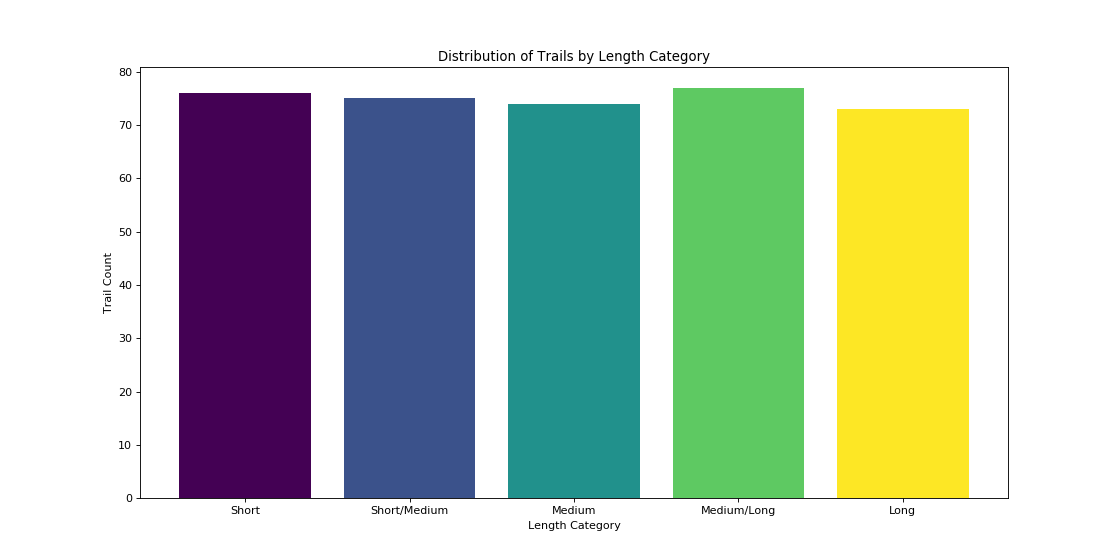

In [235]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')  
plt.bar(Bin_count['index'], Bin_count['trail_count'], color=(viridis.colors[0], viridis.colors[1], viridis.colors[2], viridis.colors[3], viridis.colors[4]))
plt.title('Distribution of Trails by Length Category')
plt.xlabel('Length Category')
plt.ylabel('Trail Count')
plt.show()

In [236]:
plt.savefig('Bar_DistributionBins.png')

In [237]:
# pulling out groups values into df
short_bin = length_bins_take2.groupby(['length_category']).get_group('Short')
shortmed_bin = length_bins_take2.groupby(['length_category']).get_group('Short/Medium')
medium_bin = length_bins_take2.groupby(['length_category']).get_group('Medium')
medlong_bin = length_bins_take2.groupby(['length_category']).get_group('Medium/Long')
long_bin = length_bins_take2.groupby(['length_category']).get_group('Long')

<IPython.core.display.Javascript object>


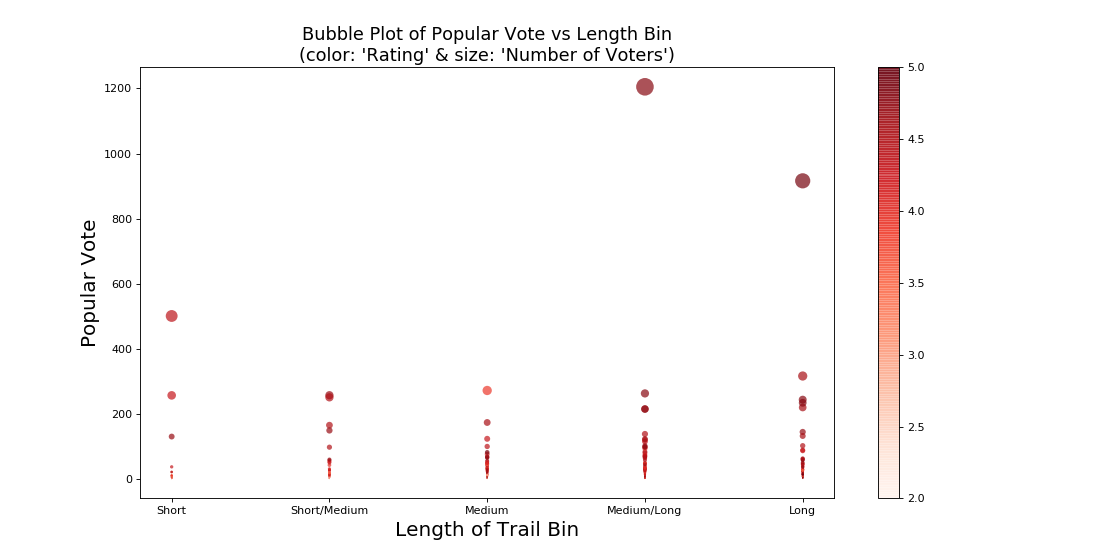

In [241]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('length_category', 'popular_vote', data=length_bins_take2, c='stars', s='starVotes', cmap='Reds', alpha=0.7, edgecolors='None', linewidths=.5)
plt.title("Bubble Plot of Popular Vote vs Length Categories\n(color: 'Rating' & size: 'Number of Voters')", fontsize=16)
plt.xlabel('Trail Length Categories', fontsize=18)
plt.ylabel('Popular Vote', fontsize=18)
plt.colorbar()
plt.show()

In [ ]:
plt.savefig('BubblePlot_DistributionBins.png')

In [258]:
# Top 5 popular trails that are short in length (maximum 1.4 miles long)
short_bin = short_bin.sort_values(by=['popular_vote'], ascending = False)
short_bin.head()

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
223,Lower Yosemite Fall Trail,4.4,114,501.6,"Yosemite Valley, California",1.0,-119.5962,37.7464,"(0.099, 1.4]",Short
219,Bridalveil Falls Trail,4.3,60,258.0,"Yosemite Valley, California",0.4,-119.6509,37.7168,"(0.099, 1.4]",Short
230,Glacier Point,4.7,28,131.6,"Yosemite Valley, California",0.5,-119.5744,37.7276,"(0.099, 1.4]",Short
224,Cook's Meadow Loop,4.3,9,38.7,"Yosemite Valley, California",1.2,-119.5875,37.7484,"(0.099, 1.4]",Short
168,Waterfall Loop Nature Trail,4.6,5,23.0,"Day Valley, California",1.0,-121.7953,37.0840,"(0.099, 1.4]",Short


In [259]:
# Top 5 popular trails that are short/medium in length (between 1.4 to 3.3 miles long)
shortmed_bin = shortmed_bin.sort_values(by=['popular_vote'], ascending = False)
shortmed_bin.head()

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
232,Sentinel Dome,4.7,55,258.5,"Yosemite Valley, California",2.1,-119.5867,37.7129,"(1.4, 3.3]",Short/Medium
135,Coastal Trail: Lands End,4.5,56,252.0,"San Francisco, California",2.9,-122.5117,37.7807,"(1.4, 3.3]",Short/Medium
233,Taft Point,4.5,37,166.5,"Yosemite Valley, California",2.3,-119.5864,37.7126,"(1.4, 3.3]",Short/Medium
117,Hillside Loop,4.7,32,150.4,"Tamalpais Valley, California",2.5,-122.5694,37.8913,"(1.4, 3.3]",Short/Medium
55,Horsetail Falls,4.5,22,99.0,"South Lake Tahoe, California",3.3,-120.1237,38.8115,"(1.4, 3.3]",Short/Medium


In [261]:
# Top 5 popular trails that are medium in length (between 3.3 to 5.54 miles long)
medium_bin = medium_bin.sort_values(by=['popular_vote'], ascending = False)
medium_bin.head()

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
229,Mirror Lake Loop,3.9,70,273.0,"Yosemite Valley, California",4.7,-119.5603,37.7393,"(3.3, 5.54]",Medium
192,Castle Rock Loop,4.6,38,174.8,"Monte Sereno, California",3.4,-122.0958,37.2307,"(3.3, 5.54]",Medium
5,Stebbins Cold Canyon Loop,4.3,29,124.7,"Winters, California",5.1,-122.0970,38.5119,"(3.3, 5.54]",Medium
118,Panoramic Loop,4.4,23,101.2,"Tamalpais Valley, California",4.5,-122.5694,37.8913,"(3.3, 5.54]",Medium
234,Taft Point to Sentinel Dome Loop,4.9,17,83.3,"Yosemite Valley, California",5.5,-119.5864,37.7127,"(3.3, 5.54]",Medium


In [263]:
# Top 5 popular trails that are medium/long in length (between 5.54 to 8.7 miles long)
medlong_bin = medlong_bin.sort_values(by=['popular_vote'], ascending = False)
medlong_bin.head()

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
235,Vernal and Nevada Falls Loop,4.8,251,1204.8,"Yosemite Valley, California",6.2,-119.5583,37.7326,"(5.54, 8.7]",Medium/Long
131,Steep Ravine - Matt Davis Loop,4.8,55,264.0,"Bolinas, California",7.1,-122.6359,37.8966,"(5.54, 8.7]",Medium/Long
144,Palomarin to Alamere Falls Out and Back,4.7,46,216.2,"Bolinas, California",8.3,-122.7462,37.9339,"(5.54, 8.7]",Medium/Long
222,Upper Yosemite Falls and Yosemite Point Hike,4.8,45,216.0,"Yosemite Valley, California",8.0,-119.6022,37.7424,"(5.54, 8.7]",Medium/Long
63,Redwood Regional Loop,4.5,31,139.5,"Piedmont, California",7.3,-122.1769,37.8036,"(5.54, 8.7]",Medium/Long


In [265]:
# Top 5 popular trails that are long in length (more than 8.7 miles long)
long_bin = long_bin.sort_values(by=['popular_vote'], ascending = False)
long_bin.head()

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
236,Half Dome,4.9,187,916.3,"Yosemite Valley, California",14.5,-119.5583,37.7325,"(8.7, 60.6]",Long
123,Tomales Point Trail,4.6,69,317.4,"Inverness, California",9.8,-122.9543,38.1891,"(8.7, 60.6]",Long
88,Mount Tallac,4.8,51,244.8,"South Lake Tahoe, California",9.9,-120.0682,38.9214,"(8.7, 60.6]",Long
227,Clouds Rest Viewpoint Trail,4.8,49,235.2,"Yosemite Valley, California",12.4,-119.4700,37.8257,"(8.7, 60.6]",Long
208,Berry Creek Falls Loop,4.6,48,220.8,"Boulder Creek, California",9.7,-122.2224,37.1721,"(8.7, 60.6]",Long


In [267]:
top_short = pd.DataFrame(short_bin.head())
top_shortMed = pd.DataFrame(shortmed_bin.head())
top_med = pd.DataFrame(medium_bin.head())
top_medLong = pd.DataFrame(medlong_bin.head())
top_long = pd.DataFrame(long_bin.head())

In [272]:
combined_result = top_short.append([top_shortMed, top_med, top_medLong, top_long])
combined_result = combined_result.reset_index().drop(['index'], axis=1)
combined_result

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
0,Lower Yosemite Fall Trail,4.4,114,501.6,"Yosemite Valley, California",1.0,-119.5962,37.7464,"(0.099, 1.4]",Short
1,Bridalveil Falls Trail,4.3,60,258.0,"Yosemite Valley, California",0.4,-119.6509,37.7168,"(0.099, 1.4]",Short
2,Glacier Point,4.7,28,131.6,"Yosemite Valley, California",0.5,-119.5744,37.7276,"(0.099, 1.4]",Short
3,Cook's Meadow Loop,4.3,9,38.7,"Yosemite Valley, California",1.2,-119.5875,37.7484,"(0.099, 1.4]",Short
4,Waterfall Loop Nature Trail,4.6,5,23.0,"Day Valley, California",1.0,-121.7953,37.0840,"(0.099, 1.4]",Short
5,Sentinel Dome,4.7,55,258.5,"Yosemite Valley, California",2.1,-119.5867,37.7129,"(1.4, 3.3]",Short/Medium
6,Coastal Trail: Lands End,4.5,56,252.0,"San Francisco, California",2.9,-122.5117,37.7807,"(1.4, 3.3]",Short/Medium
7,Taft Point,4.5,37,166.5,"Yosemite Valley, California",2.3,-119.5864,37.7126,"(1.4, 3.3]",Short/Medium
8,Hillside Loop,4.7,32,150.4,"Tamalpais Valley, California",2.5,-122.5694,37.8913,"(1.4, 3.3]",Short/Medium
9,Horsetail Falls,4.5,22,99.0,"South Lake Tahoe, California",3.3,-120.1237,38.8115,"(1.4, 3.3]",Short/Medium


In [327]:
combined_result['marker_color']=combined_result['length_category']
combined_result['marker_color']= combined_result['marker_color'].replace(['Short', 'Short/Medium', 'Medium', 'Medium/Long', 'Long'], ['blue', 'green', 'orange', 'red', 'purple'])
combined_result

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category,marker_color
0,Lower Yosemite Fall Trail,4.4,114,501.6,"Yosemite Valley, California",1.0,-119.5962,37.7464,"(0.099, 1.4]",Short,blue
1,Bridalveil Falls Trail,4.3,60,258.0,"Yosemite Valley, California",0.4,-119.6509,37.7168,"(0.099, 1.4]",Short,blue
2,Glacier Point,4.7,28,131.6,"Yosemite Valley, California",0.5,-119.5744,37.7276,"(0.099, 1.4]",Short,blue
3,Cook's Meadow Loop,4.3,9,38.7,"Yosemite Valley, California",1.2,-119.5875,37.7484,"(0.099, 1.4]",Short,blue
4,Waterfall Loop Nature Trail,4.6,5,23.0,"Day Valley, California",1.0,-121.7953,37.0840,"(0.099, 1.4]",Short,blue
5,Sentinel Dome,4.7,55,258.5,"Yosemite Valley, California",2.1,-119.5867,37.7129,"(1.4, 3.3]",Short/Medium,green
6,Coastal Trail: Lands End,4.5,56,252.0,"San Francisco, California",2.9,-122.5117,37.7807,"(1.4, 3.3]",Short/Medium,green
7,Taft Point,4.5,37,166.5,"Yosemite Valley, California",2.3,-119.5864,37.7126,"(1.4, 3.3]",Short/Medium,green
8,Hillside Loop,4.7,32,150.4,"Tamalpais Valley, California",2.5,-122.5694,37.8913,"(1.4, 3.3]",Short/Medium,green
9,Horsetail Falls,4.5,22,99.0,"South Lake Tahoe, California",3.3,-120.1237,38.8115,"(1.4, 3.3]",Short/Medium,green


In [328]:
# Save results to csv
combined_result.to_csv('top_trail_length.csv')

In [329]:
# Make an empty map using folium
m = folium.Map(location=[38.1341,-121.2722], tiles="cartodbpositron", zoom_start=8.2)
 
# Add marker one by one on the map
for i,row in combined_result.iterrows():
   folium.Marker(
      location=[row['latitude'], row['longitude']],
      icon=folium.Icon(color=row['marker_color']),
      popup=row['name'],
      tooltip=f'Trail Length Category: {row["length_category"]}'
   ).add_to(m)

In [331]:
m

In [332]:
# Save as html
m.save('mymap.html')